In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


import io
df = pd.read_excel('/content/1688640705_hr_comma_sep.xlsx')
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000  

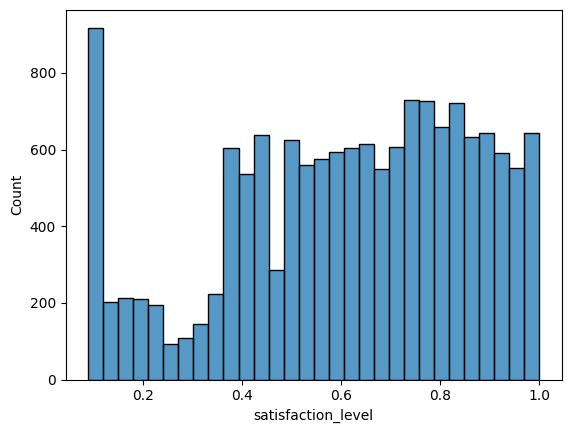

In [4]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Initial exploration of data distribution
sns.histplot(df['satisfaction_level'])
plt.show()


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0        False         

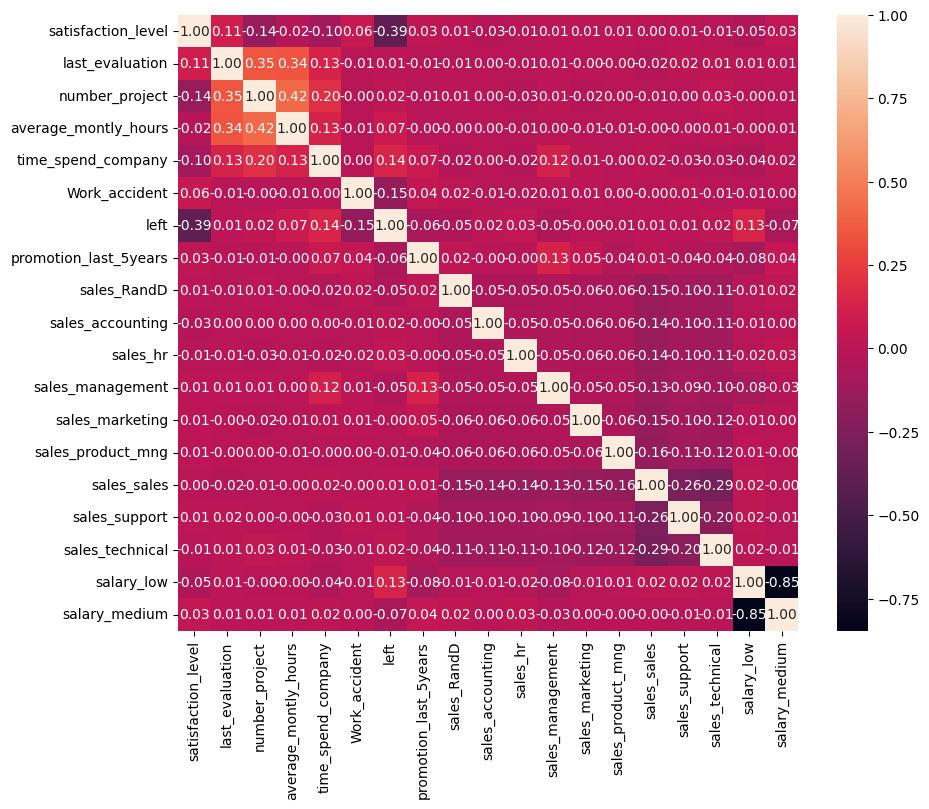

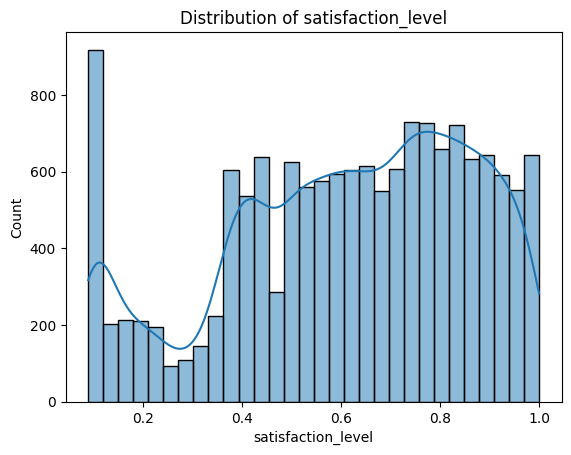

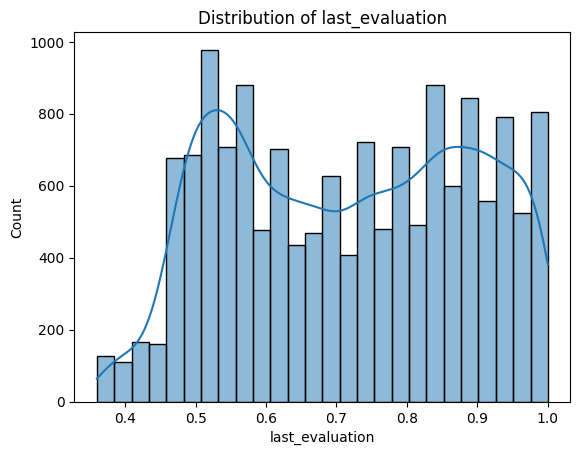

KeyError: 'average_monthly_hours'

In [9]:
# Converting categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the new dataframe with encoded categorical features
print(df_encoded.head())

# Correlation matrix heatmap of the encoded dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.show()

# Distribution plots for key columns
for column in ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bar plot for number of projects
sns.countplot(x='number_projects', hue='left', data=df)
plt.title('Employee Project Count by Turnover Status')
plt.show()


In [6]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Splitting the data
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Handling class imbalance
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000

Confusion Matrix:
 [[1768  518]
 [ 185  529]]


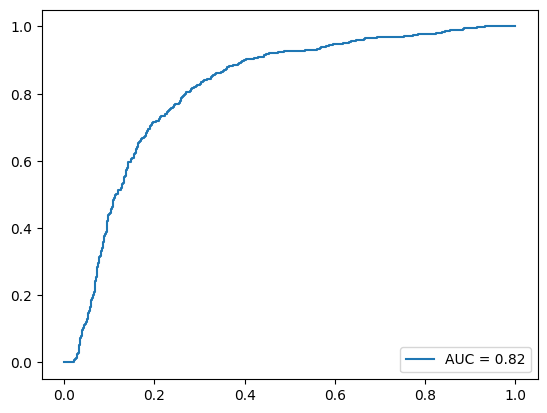

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[2274   12]
 [  16  698]]


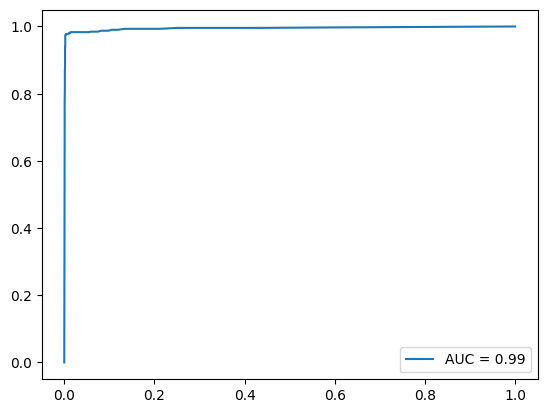

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
 [[2231   55]
 [  47  667]]


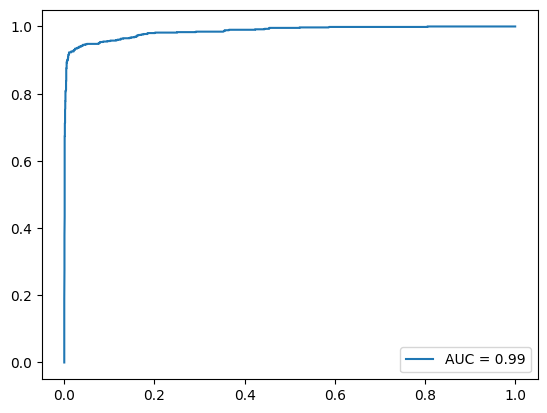

In [12]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

    # ROC Curve
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.show()

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
train_evaluate_model(logreg, X_train_sm, y_train_sm, X_test, y_test)

# Random Forest
rf = RandomForestClassifier()
train_evaluate_model(rf, X_train_sm, y_train_sm, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingClassifier()
train_evaluate_model(gb, X_train_sm, y_train_sm, X_test, y_test)


In [11]:
df_test = X_test.copy()
df_test['predicted_probabilities'] = gb.predict_proba(X_test)[:, 1]
df_test['Risk_Zone'] = pd.cut(df_test['predicted_probabilities'], bins=[0, 0.2, 0.6, 0.9, 1], labels=['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone'])
print(df_test[['Risk_Zone']])


            Risk_Zone
10627       Safe Zone
2703   High Risk Zone
6059        Safe Zone
3258        Safe Zone
4565        Safe Zone
...               ...
4961        Safe Zone
4557        Safe Zone
6610        Safe Zone
10327       Safe Zone
731    High Risk Zone

[3000 rows x 1 columns]
